In [1]:
# IMPORT MODULES
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

### Reflect Tables into SQLAlchemy ORM

In [2]:
# engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [4]:
# We can view all of the classes that automap found
# This tells us there are two tables in the SQLite file: Measurement and Station 
Base.classes.keys()

['measurement', 'station']

In [5]:
 # Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

### Exploratory Climate Analysis

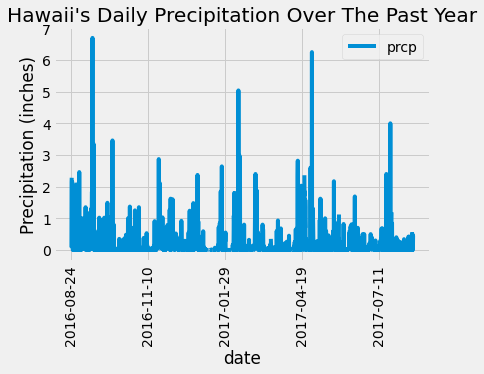

In [52]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Data exloration via TablePlus revealed that Aug 24, 2017 is latest date in the data, 
# so pulling every date greater than Aug 23, 2016 gives us last year of data
last_twelve = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > "2016-08-23").order_by(Measurement.date.asc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
last_twelve_df = pd.DataFrame(last_twelve)
last_twelve_df.set_index('date',inplace=True)
last_twelve_df = last_twelve_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
graph = last_twelve_df.plot(rot=90)
graph.set_title("Hawaii's Daily Precipitation Over The Past Year")
graph.set_ylabel("Precipitation (inches)");

In [53]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_twelve_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [54]:
# Design a query to show how many stations are available in this dataset?
# Data exloration via TablePlus revealed that the STATION table in the SQLite dataset contains the Stations
# Do a basic count function via session query to count number of stations in the STATION SQLite table
weatherstation_count = session.query(func.count(Station.id)).all()
weatherstation_count

[(9)]

In [58]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations
# We can see that USC00519281 is the most active station with 2,772 observations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [76]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
Min_Temp = session.query(func.min(Measurement.tobs).filter(Measurement.station == 'USC00519281')).all()
Max_Temp = session.query(func.max(Measurement.tobs).filter(Measurement.station == 'USC00519281')).all()
Avg_Temp = session.query(func.avg(Measurement.tobs).filter(Measurement.station == 'USC00519281')).all()
print(f"Min Temp: {Min_Temp}")
print(f"Max Temp: {Max_Temp}")
print(f"Avg Temp: {Avg_Temp}")

Min Temp: [(54.0,)]
Max Temp: [(85.0,)]
Avg Temp: [(71.66378066378067,)]


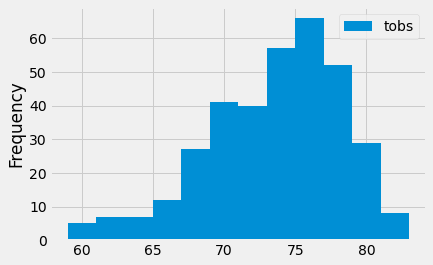

In [90]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Filter for Station ID USC00519281 (most observations) and dates after Aug 23, 2016 (last 12 months)
top_data = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').filter(Measurement.date > "2016-08-23").\
    order_by(Measurement.date.asc()).all()
# Create Histogram
top_data_df = pd.DataFrame(top_data)
top_data_df.plot(kind="hist",bins=12)
plt.xlabel("Weight (g)");